# Importing required modules

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Getting the data

### Using some Data Augmentation techniques for more data and Better results.

- Shearing of images
- Random zoom
- Horizontal flips

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
#preparing the training and test set and reshaping the images
training_set = train_datagen.flow_from_directory("dataset/training_set",
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

testing_set = test_datagen.flow_from_directory("dataset/test_set",
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')

Found 11601 images belonging to 2 classes.
Found 1950 images belonging to 2 classes.


# Designing the model

In [3]:
#using the tf.keras.Sequential model for stacking layers. 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'),
    #if stride not given it equal to pool filter size
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
  tf.keras.layers.Flatten(),
# flattening after the model has been transformed from a matrix that is much wider and higher than it is deep, to a very small but very deep matrix 
  tf.keras.layers.Dense(units=128,activation='relu'),
  tf.keras.layers.Dense(units=1,activation='sigmoid')
])

# Training the data

In [4]:
#Compile defines the loss function, the optimizer and the metrics.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
#This method adjusts the model parameters to minimize the loss
model.fit_generator(training_set, 
                         steps_per_epoch=290, 
                         epochs=7, 
                         validation_data=testing_set, 
                         validation_steps=60)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/7
290/290 [==============================] - 94s 322ms/step - loss: 0.6772 - accuracy: 0.5751 - val_loss: 0.6421 - val_accuracy: 0.6245
Epoch 2/7
290/290 [==============================] - 102s 351ms/step - loss: 0.6134 - accuracy: 0.6682 - val_loss: 0.5516 - val_accuracy: 0.7401
Epoch 3/7
290/290 [==============================] - 114s 395ms/step - loss: 0.5749 - accuracy: 0.7043 - val_loss: 0.5272 - val_accuracy: 0.7479
Epoch 4/7
290/290 [==============================] - 111s 384ms/step - loss: 0.5451 - accuracy: 0.7274 - val_loss: 0.5319 - val_accuracy: 0.7443
Epoch 5/7
290/290 [==============================] - 91s 313ms/step - loss: 0.5151 - accuracy: 0.7445 - val_loss: 0.5361 - val_accuracy: 0.7458
Epoch 6/7
290/290 [==============================] - 87s 300ms/step - loss: 0.4967 - accuracy: 0.7572 - val_loss: 0.4813 - val_accuracy: 0.7740
Epoch 7/7
290/290 [==============================] - 89s 

# Evaluating the data

### Let's first try predicting an image from the internet

In [6]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("dataset/single_prediction/cat_or_dog_1.jpg", 
                            target_size = (64, 64))
# till here test_image is storing an image,
# now to convert it to a 3D array
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [7]:
test_image = np.expand_dims(test_image, axis = 0)
print(test_image.shape)

result = model.predict(test_image)
print(result.shape)

print("result: ", result)

(1, 64, 64, 3)
(1, 1)
result:  [[1.]]


In [8]:
#To find out what value is given to both the classes
training_set.class_indices

{'cats': 0, 'dogs': 1}

dog


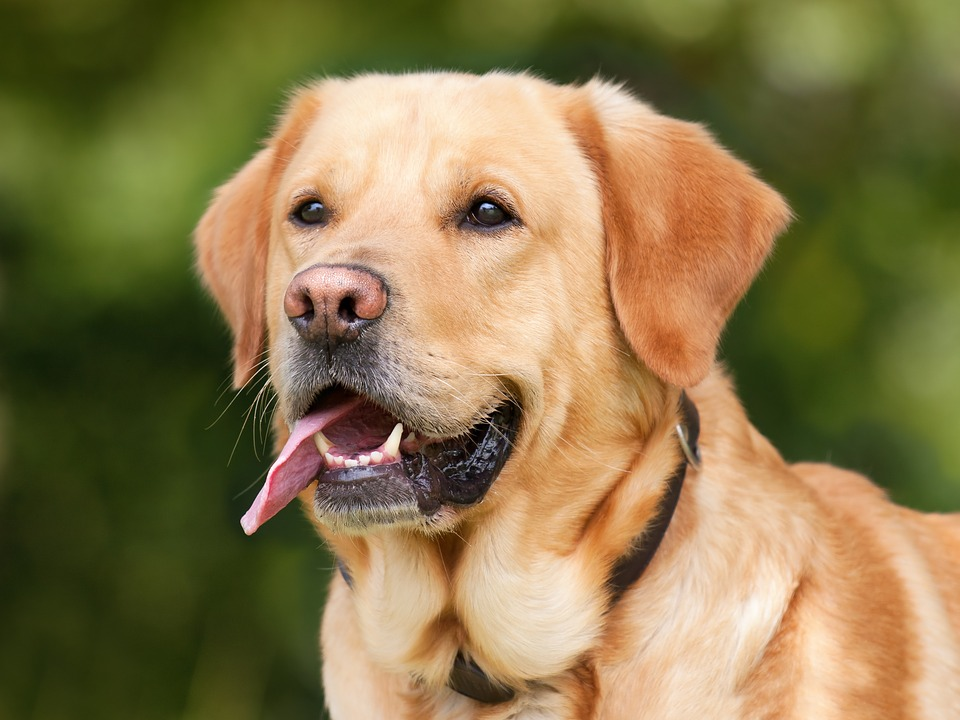

In [9]:
# because result has the shape of (1,1)
if result[0][0] == 1: 
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)
#To display the image 
from IPython.display import Image
Image(filename="dataset/single_prediction/cat_or_dog_1.jpg", width=250, height=250)

In [10]:
#This gives the detailed summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Accuracy and the loss function after training the model

In [11]:
#The Model.evaluate method checks the models performance on the"Test-set"
model.evaluate(testing_set, verbose=2)

61/61 - 11s - loss: 0.4861 - accuracy: 0.7723


[0.4861067533493042, 0.7723076939582825]

## Classifying images in the testset

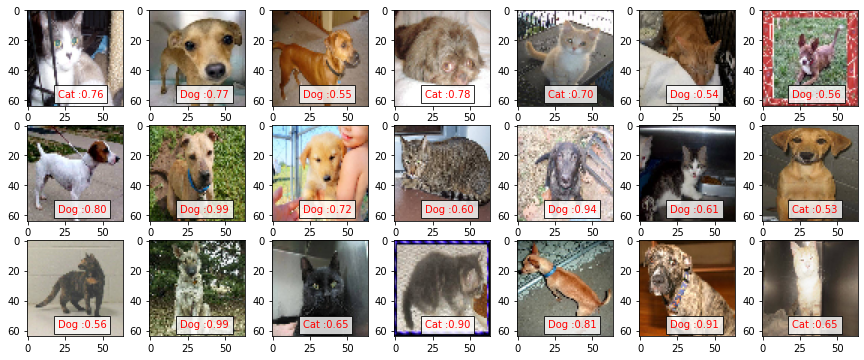

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('dataset/test_set/'+testing_set.filenames[np.random.choice(range(1950))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)
#if we take more training examples we will have a more accurate prediction